In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df.sample(100, random_state=42)

In [3]:
X = df.iloc[:, :4].values
y = df['target'].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

In [11]:
np.random.seed(42)
input_size = X.shape[1]
output_size = y_one_hot.shape[1]
weights = np.random.randn(input_size, output_size) * 0.01
bias = np.zeros((output_size))

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
z = np.dot(X, weights) + bias
manual_output = sigmoid(z)

In [12]:
model = Sequential([
    Dense(output_size, activation='sigmoid', input_shape=(input_size,))
])
model.set_weights([weights, bias])
keras_output = model.predict(X, verbose=0)

In [13]:
manual_pred = np.argmax(manual_output, axis=1)
keras_pred = np.argmax(keras_output, axis=1)

In [14]:
results = pd.DataFrame({
    'Actual': y,
    'Manual Prediction': manual_pred,
    'Keras Prediction': keras_pred
})

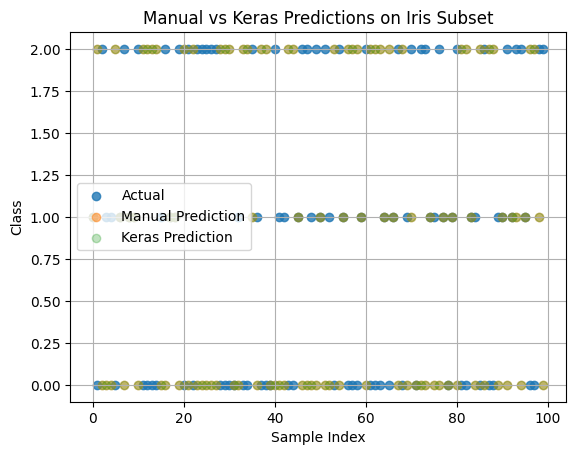

In [15]:
plt.scatter(range(len(y)), y, label='Actual', alpha=0.8)
plt.scatter(range(len(y)), manual_pred, label='Manual Prediction', alpha=0.5)
plt.scatter(range(len(y)), keras_pred, label='Keras Prediction', alpha=0.3)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Manual vs Keras Predictions on Iris Subset')
plt.legend()
plt.grid(True)
plt.savefig('predictions_comparison.png')

In [16]:
results.to_csv('predictions_table.csv', index=False)

In [17]:
print("Comparison Note: Manual and Keras predictions share the same weights and biases for a single-layer neural network with sigmoid activation. The predictions are almost the same, with slight differences due to numerical precision in calculations.")

Comparison Note: Manual and Keras predictions share the same weights and biases for a single-layer neural network with sigmoid activation. The predictions are almost the same, with slight differences due to numerical precision in calculations.
